In [268]:
import csv
import pydot
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import scipy.stats as stats
import random
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [269]:
trainx=pd.read_csv("./HeartDisease.csv")

In [270]:
print(trainx.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  


In [271]:
trainx.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Pasamos la variable de lugar a numerica. 0 para hungary, 1 para VA y 2 para otros

In [272]:
train = trainx.copy()
train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")] = 2
train["Place"][train["Place"] == "Hungary"] = 0
train["Place"][train["Place"] == "VA"] = 1
#
#pdf = train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")]

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Diagramas
Para la primera parte del proyecto se pide realizar histogramas y diagrmas de torta con los datos cargados en el paso anterior para lo cual se deben convertir a enteros mediante la funcion convertirentero, para los histogramas usamos la funcion graficar y para los diagramas de torta la funcion graficarpie, al final tenemos un for que recorre cada columna del dataFrame y la pasa a la funcion correspondiente, como se ve a continuacion:


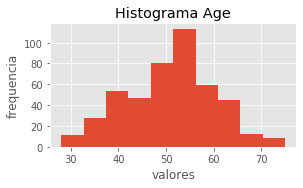

<Figure size 1152x648 with 0 Axes>

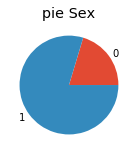

<Figure size 1152x648 with 0 Axes>

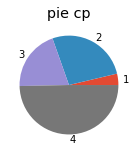

D:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1152x648 with 0 Axes>

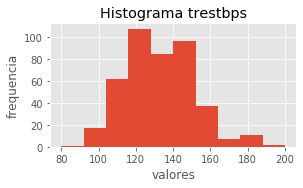

<Figure size 1152x648 with 0 Axes>

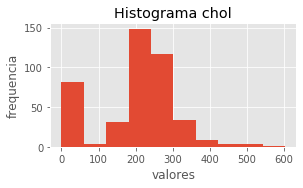

<Figure size 1152x648 with 0 Axes>

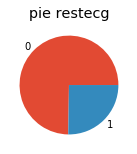

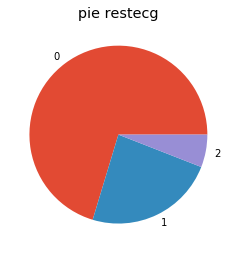

<Figure size 1152x648 with 0 Axes>

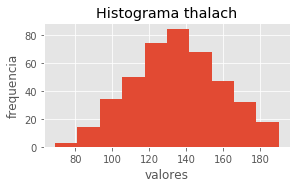

<Figure size 1152x648 with 0 Axes>

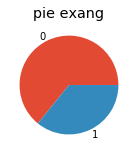

<Figure size 1152x648 with 0 Axes>

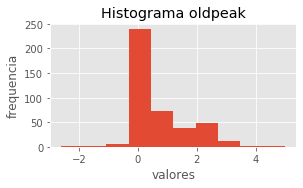

<Figure size 1152x648 with 0 Axes>

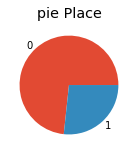

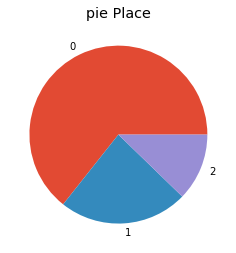

<Figure size 1152x648 with 0 Axes>

In [273]:
def graficar(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    plt.subplot2grid((2,3),(0,0))
    plt.hist(vector, 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma'+ ' ' + nombre)
    plt.show()
    plt.clf()
    
def graficarpie(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    veces0 = np.count_nonzero(vector == 0)
    veces1 = np.count_nonzero(vector == 1)
    veces2 = np.count_nonzero(vector == 2)
    veces3 = np.count_nonzero(vector == 3)
    veces4 = np.count_nonzero(vector == 4)
    if veces0 != 0 and veces1 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1],labels =["0","1"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces0 != 0 and veces1 != 0 and veces2 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1,veces2],labels =["0","1","2"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces1 != 0 and veces2 != 0 and veces3 != 0 and veces4 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces1,veces2,veces3,veces4],labels =["1","2","3","4"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()


for columna in train:
    if columna == "oldpeak" or columna == "thalach" or columna == "chol" or columna == "trestbps" or columna == "Age":
        graficar(train[columna].values,columna)
    elif columna == "Sex" or columna == "Place" or columna == "exang" or columna == "restecg" or columna == "fps" or columna == "cp":
        graficarpie(train[columna].values,columna)
    
        
    


In [274]:
print(train.isnull().sum().sum())

217


In [275]:
train.describe()


,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [276]:
print(train.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num Place  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0  


### Analizamos como rellenar los datos faltantes
- En el colesterol (chol) es interesante pensar en el promedio, 
    aunque se me ocurren muchas maneras, como poner el promedio de similares.
- En la presion arterial con la que ingresaron (trestbps) es interesante utilizar promedio
    aunque plantear el uso de similitudes se debe considerar.
- En el campo que indica si si tiene el azucar en la sangre > 120 mg/dl (fbs) se debe considerar que 1 es para true
    y 0 es para false, sin embargo no es un campo que podamos rellenar a la ligera
    por lo tanto se debe considerar si se elimina.
- Los resultados electrocardiográficos en reposo (restecg) son Value 0: normal, Value 1: con anormalidad de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0.05 mV) y Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes. Por todo lo anterior rellenarlos no es factible con el promedio.
- La frecuencia cardíaca máxima alcanzada (thalach) es otro atributo que se puede relenar con promedios pero
    considerando que esto es un principal sintoma de afeciones cardiacas, por lo que recomiendo
    utilizar el promedio pero de los que poseen afecciones en caso de afectado, o promedio de los que no en caso
    de ser una persona que no se le encontro afeciones cardiacas.
- La depresión del ST inducida por el ejercicio relativo al descanso (oldpeak) tiene como valores Valor 1: pendiente ascendente - Valor 2: plano - Valor 3: pendiente descendente. este valor no es factible rellenarlo
- La angina inducida por ejercicio (1 = sí; 0 = no) (exang) es otro valor que conviene analizar la forma de rellenarlo, ya que aplicar un simple promedio no es valido.

    


## Rellenando los datos con ayuda medica
Para tener unos datos mas confiables la información restante se completa utilizando el criterios medicos encontrados en la web y con la ayuda del medico xxxx quien presto su asesoramiento en temas cardiacos. Por tal motivo los se definen los datos faltamtes de esta forma:

- En el colesterol (chol) se rellena con promedio, pero relacionando afeciones cardiacas con dicho promedio, es decir si el dato faltante corresponde a una persona con afeccion cardiaca se rellena con promedio de afecciones cardiacas.

In [277]:
cholPromDisease = train["chol"][train["num"] == 1].mean()
cholPromNotDisease = train["chol"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y colesterol
train["chol"][train["num"] == 0] = train["chol"].fillna(cholPromNotDisease)
train["chol"][train["num"] == 1] = train["chol"].fillna(cholPromDisease)
print(cholPromNotDisease)
print(cholPromDisease)

print(train.isnull().sum().sum())
#.mean ()

217.30701754385964
180.66502463054186
191


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


- En la presion arterial con la que ingresaron (trestbps) se plantea el mismo tipo de promedio que en Colesterol

In [278]:
trestbpsPromDisease = train["trestbps"][train["num"] == 1].mean()
trestbpsPromNotDisease = train["trestbps"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["trestbps"][train["num"] == 0] = train["trestbps"].fillna(trestbpsPromNotDisease)
train["trestbps"][train["num"] == 1] = train["trestbps"].fillna(trestbpsPromDisease)
print(trestbpsPromNotDisease)
print(trestbpsPromDisease)

print(train.isnull().sum().sum())

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


130.3920704845815
132.751269035533
158


- La frecuencia cardíaca máxima alcanzada (thalach) se rellena igual que el colesterol

In [279]:
thalachPromDisease = train["thalach"][train["num"] == 1].mean()
thalachPromNotDisease = train["thalach"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["thalach"][train["num"] == 0] = train["thalach"].fillna(trestbpsPromNotDisease)
train["thalach"][train["num"] == 1] = train["thalach"].fillna(trestbpsPromDisease)
print(thalachPromNotDisease)
print(thalachPromDisease)

print(train.isnull().sum().sum())

141.88105726872246
126.87817258883248
125


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


- El valor de angina por ejercicio es muy interesante de analizar. Esta condicion se presenta normalmente en personas mayores de 30 (mujeres 35/40) con enfermedad arterial coronaria (EAC), es decir se presenta cuando aparece una condicion cardiaca y como el estrechamiento de la válvula aórtica del corazón (estenosis aórtica). que tambien se relaciona con taponamientos debido a altos niveles de colesterol. Dado lo anterior se propone rellenar este valor dependiendo de si presenta una afeccion cardiaca, si tiene un colestrol alto y si es mayor de 35.

In [280]:
train["exang"][(train["num"] == 1) & (train["Age"] > 35) & (train["chol"] > 160.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 1) & (train["Age"] < 30) & (train["chol"] < 130.0 ) ] = train["exang"].fillna(0)
train["exang"][(train["num"] == 0) & (train["Age"] > 35) & (train["chol"] > 190.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 0) & (train["Age"] < 30) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["exang"]=train["exang"].fillna(0)


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: Set

- Para los valores de glucosa (FBS) es interesante conocer que los niveles altos de clucosa se asocian con la diabetes que es uno de los factores mas reconocidos de la aparicion de cardiopatias, es por eso que este valor se puede rellenar considerando los valores de cardiopatias. Tambien se asocia las cardiopatias diabeticas y el colesterol alto. Por lo anterior se utilizaran estos 2 valores para aportar mas información al dataset

In [281]:
train["fbs"][(train["num"] == 1) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(1)
train["fbs"][(train["num"] == 0) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["fbs"]=train["fbs"].fillna(0)



D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Valores de electrocardiogramas y segmentos ST
Para estos valores hacer analisis sobre los datos es muy complejo, ya que son el resultado de medotod medicos muy especificos, es por tal motivo que se decide eliminar estos valores.

In [282]:
del train["restecg"]
del train["oldpeak"]
print(train.isnull().sum().sum())

0


In [283]:
print(train.head())
train.describe()


   ID  Age  Sex  cp  trestbps        chol  fbs  thalach  exang  num Place
0   1   28    1   2     130.0  132.000000  0.0    185.0    0.0    0     0
1   2   29    1   2     120.0  243.000000  0.0    160.0    0.0    0     0
2   3   29    1   2     140.0  217.307018  0.0    170.0    0.0    0     0
3   4   30    0   1     170.0  237.000000  0.0    170.0    0.0    0     0
4   5   31    0   2     100.0  219.000000  0.0    150.0    0.0    0     0


,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.476166,200.469340,0.310722,134.651221,0.380744,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.138033,110.263265,0.463296,23.377752,0.486102,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,69.000000,0.000000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,179.000000,0.000000,120.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,217.307018,0.000000,132.751269,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,266.000000,1.000000,150.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,190.000000,1.000000,1.000000


# ARBOL DE DESICION
Como primer paso para nuestro arbol de desicion comenzaremos a realizar un analisis a los datos de entrada para determinar el numero de datos que tenemos las instancias positivas y negativas de estos y todo lo que nos pueda brindar informacion para que nuestro arbol pueda ser lo mas exacto posible.

Para esto usaremos herramientas de conteo y analizaremos las tendencias que puedan tener los datos para ayudarnos a determinar cuales serian los mejores nodos de nuestro arbol.

In [284]:
train.shape

(457, 11)

In [285]:
train.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num,Place
0,1,28,1,2,130.0,132.000000,0.0,185.0,0.0,0,0
1,2,29,1,2,120.0,243.000000,0.0,160.0,0.0,0,0
2,3,29,1,2,140.0,217.307018,0.0,170.0,0.0,0,0
3,4,30,0,1,170.0,237.000000,0.0,170.0,0.0,0,0
4,5,31,0,2,100.0,219.000000,0.0,150.0,0.0,0,0


In [286]:
print(train.groupby('num').size())

num
0    247
1    210
dtype: int64


Como resultado obtenemos que 247 de las salidas son 0 y 210  son 1, es decir que son muy iguales pero hay cierto desbalance el cual tendremos en cuenta al momento de crear el arbol, a continuación procederemos a ver la diferencia de forma grafica.

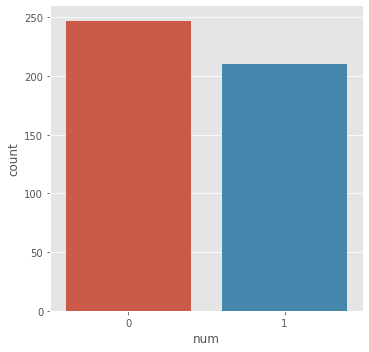

In [287]:
sb.catplot('num',data=train,kind="count")

De forma similar a como con la columna "num" podemos hacerlo con todas las columnas esto nos permitira ver que tan dispersos son los datos de entrada, vamos a hechar un vistazo con algunas de las columnas:

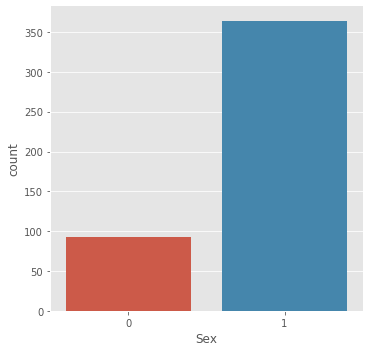

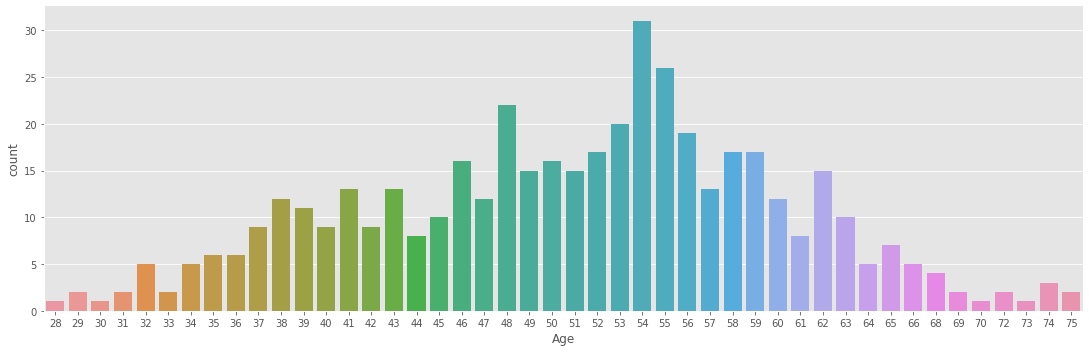

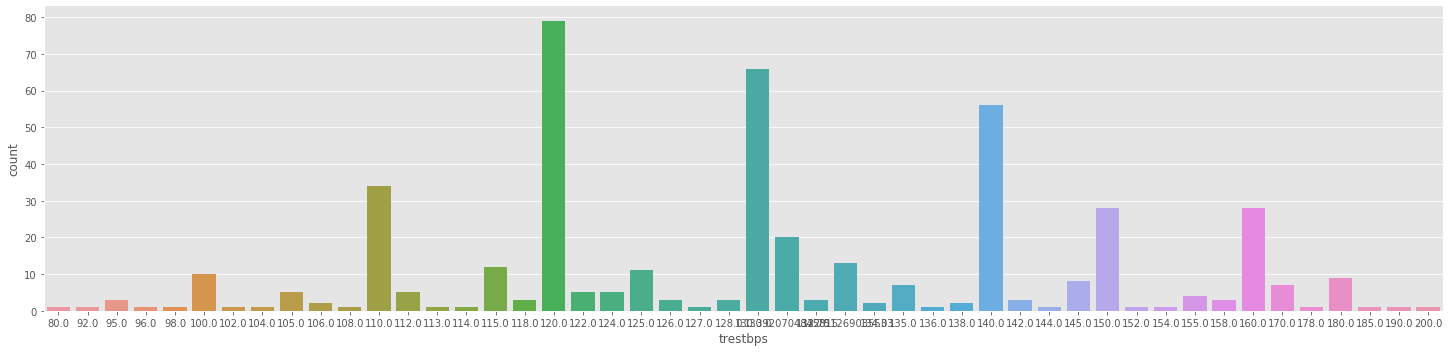

In [288]:
sb.catplot('Sex',data=train,kind="count")
sb.catplot('Age',data=train,kind="count",aspect = 3)
sb.catplot('trestbps',data=train,kind="count",aspect = 4)

En las graficas podemos observar que se marcan ciertas tendencias hacia ciertos datos lo cual nos puede ayudar a determinar los  nodos de nuestro arbol, veremos otros ejemplo de visualización de datos que nos pueden aportar información:

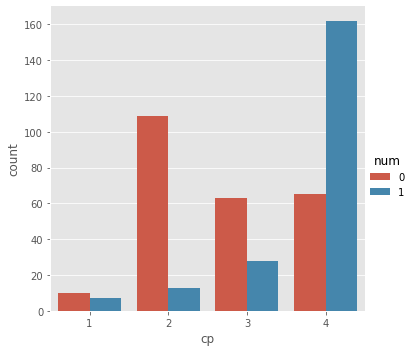

In [289]:
sb.catplot('cp',data=train,hue='num',kind="count")

Como podemos observar este grafico nos indica que cuando el valor del cp es 4 hay una mayor probabilidad de que la salida sea 1 mientras que cuando es 1,2 o 3 hay una probabilidad mas alta de que sea 0.

Ahora probamos un ultimo grafico que nos mostrara la salida segun el nivel de colesterol y la edad:


 Relacion edad-colesterol, azul positivos - naranja negativo


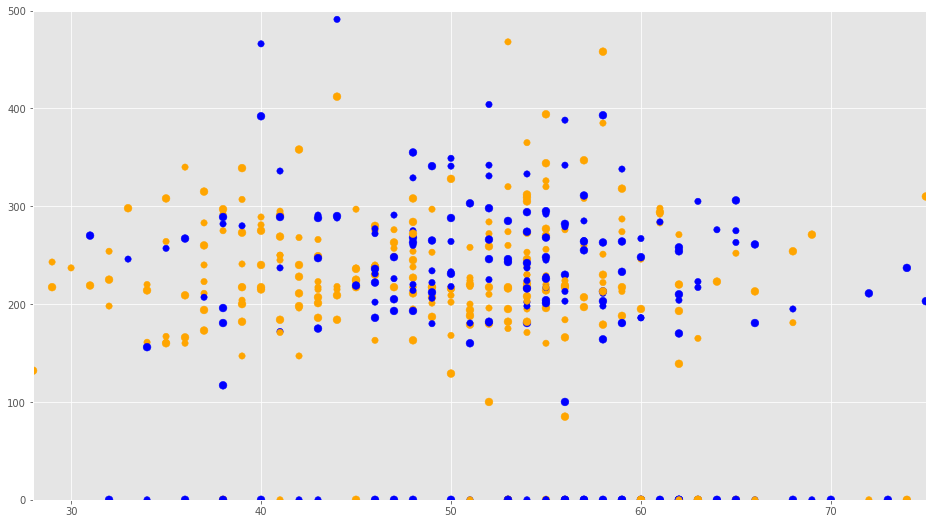

Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama


In [290]:
print( "\n Relacion edad-colesterol, azul positivos - naranja negativo")
f1 = train['Age'].values
f2 = train['chol'].values
#Azul positivo
#Naranja Negativo
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=[60,40] # si no estaban declarados previamente
 
asignar=[]
asignar2=[]
for index, row in train.iterrows():    
    asignar.append(colores[row['num']])
    asignar2.append(tamanios[row['num']])
 
plt.scatter(f1, f2, c=asignar, s=tamanios)
plt.axis([28,75,0,500])
plt.show()

print("Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama")




# Mapeo de datos

Para poder realizar el arbol de desicion es necesario mapear los datos es decir acomodarlos en rangos donde sera mucho mas facil su manipulación, a continuacion paseremos a acomodar estos datos en un nuevo dataframe y a visualizar el nuevo resultado:

In [291]:
# Age Mapping 
train.loc[ train['Age'] <= 38, 'AgeEncoded'] = 0
train.loc[(train['Age'] > 38) & (train['Age'] <= 48), 'AgeEncoded'] = 1
train.loc[(train['Age'] > 48) & (train['Age'] <= 58), 'AgeEncoded'] = 2
train.loc[(train['Age'] > 58) & (train['Age'] <= 68), 'AgeEncoded'] = 3
train.loc[ train['Age'] > 68, 'AgeEncoded'] = 4


# trestbps Mapping 
train.loc[ train['trestbps'] <= 100, 'trestbpsEncoded'] = 0
train.loc[(train['trestbps'] > 100) & (train['trestbps'] <= 120), 'trestbpsEncoded'] = 1
train.loc[(train['trestbps'] > 120) & (train['trestbps'] <= 140), 'trestbpsEncoded'] = 2
train.loc[(train['trestbps'] > 140) & (train['trestbps'] <= 160), 'trestbpsEncoded'] = 3
train.loc[(train['trestbps'] > 160) & (train['trestbps'] <= 180), 'trestbpsEncoded'] = 4
train.loc[ train['trestbps'] > 180, 'trestbpsEncoded'] = 5

# chol Mapping 
train.loc[ train['chol'] <= 100, 'cholEncoded'] = 0
train.loc[(train['chol'] > 100) & (train['chol'] <= 200), 'cholEncoded'] = 1
train.loc[(train['chol'] > 200) & (train['chol'] <= 300), 'cholEncoded'] = 2
train.loc[(train['chol'] > 300) & (train['chol'] <= 400), 'cholEncoded'] = 3
train.loc[(train['chol'] > 400) & (train['chol'] <= 500), 'cholEncoded'] = 4
train.loc[ train['chol'] > 500, 'cholEncoded'] = 5

# thalach Mapping 
train.loc[ train['thalach'] <= 90, 'thalachEncoded'] = 0
train.loc[(train['thalach'] > 90) & (train['thalach'] <= 110), 'thalachEncoded'] = 1
train.loc[(train['thalach'] > 110) & (train['thalach'] <= 130), 'thalachEncoded'] = 2
train.loc[(train['thalach'] > 130) & (train['thalach'] <= 150), 'thalachEncoded'] = 3
train.loc[(train['thalach'] > 150) & (train['thalach'] <= 170), 'thalachEncoded'] = 4
train.loc[ train['thalach'] > 170, 'thalachEncoded'] = 5


drop_elements = ['ID','Age','trestbps','chol','thalach']
train_encoded = train.drop(drop_elements, axis = 1)
train_encoded.head()


,Sex,cp,fbs,exang,num,Place,AgeEncoded,trestbpsEncoded,cholEncoded,thalachEncoded
0,1,2,0.0,0.0,0,0,0.0,2.0,1.0,5.0
1,1,2,0.0,0.0,0,0,0.0,1.0,2.0,4.0
2,1,2,0.0,0.0,0,0,0.0,2.0,2.0,4.0
3,0,1,0.0,0.0,0,0,0.0,4.0,2.0,4.0
4,0,2,0.0,0.0,0,0,0.0,0.0,2.0,3.0


Una vez mapeados los datos vamos a mostrar como se relacionan respecto a la salida num cuando esta es 1 

In [292]:
train_encoded[['AgeEncoded', 'num']].groupby(['AgeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])


num          
                mean count sum
AgeEncoded                    
0.0         0.352941    51  18
1.0         0.357724   123  44
2.0         0.481481   189  91
3.0         0.602410    83  50
4.0         0.636364    11   7

Vemos que la mayoria de casos positiva esta en los rangos 1,2 y 3 que seria entre 38 y 68 años y la mayoria casos positivos esta entre el rango 2 de edad 48 y 58 con 91.

In [293]:
train_encoded[['cholEncoded', 'num']].groupby(['cholEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

num          
                 mean count sum
cholEncoded                    
0.0          0.741176    85  63
1.0          0.328947    76  25
2.0          0.396761   247  98
3.0          0.450000    40  18
4.0          0.500000     6   3
5.0          1.000000     3   3

Para el caso del colesterol vemos que predominan el rango 2 que es donde mas casos positivos se encuentran con 98 el cual pertenece al rango de 300 y 400.

# Entrenamiento
Lo primero que vamos a determinar es el numero de niveles que tendra nuestro arbol para ello nos ayudaremos de la funcion KFold ue nos ayudará a crear varios subgrupos con nuestros datos de entrada para validar y valorar los árboles con diversos niveles de profundidad. De entre ellos, escogemos el de mejor resultado, seguido creamos y configuramos el arbol con los siguientes parametros.

**criterion**=entropy ó podría ser gini, pero utilizamos entradas categóricas
**min_samples_split**=20 se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
**min_samples_leaf**=5 cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría esa hoja y «subiría» un nivel, su antecesor.
**class_weight**={1:1.17} con esto compensamos los desbalances que hubiera. En nuestro caso, tenemos menos etiquetas de tipo top=1 . Por lo tanto, le asignamos 3.5 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de top=0 (son 247) con los top=1 (son 210).


In [294]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(train_encoded))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:0.85})
    for train_fold, valid_fold in cv.split(train):
        f_train = train_encoded.loc[train_fold] 
        f_valid = train_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['num'], axis=1), 
                               y = f_train["num"]) 
        valid_acc = model.score(X = f_valid.drop(['num'], axis=1), 
                                y = f_valid["num"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)


# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df2 = df2[["Max Depth", "Average Accuracy"]]
print(df2.to_string(index=False))


print("Observamos que en 4 splits obtuvimos un porcetaje mayor al 67%, por lo tanto craremos nuestro arbol con 4 niveles")



 Max Depth  Average Accuracy
         1          0.752271
         2          0.682415
         3          0.743333
         4          0.673913
         5          0.656184
         6          0.651932
         7          0.649758
         8          0.647536
         9          0.649710
        10          0.656232
Observamos que en 4 splits obtuvimos un porcetaje mayor al 67%, por lo tanto craremos nuestro arbol con 4 niveles


partimos el 80% de los datos para entrenamiento y el 20 % para pruebas

In [295]:
# vamos a definir los objetivos en target y los predictores
features = train[["Age","Sex","cp", "trestbps", "thalach", "exang","chol","fbs"]].values
target = train["num"].values


features_encoded = train_encoded[["Sex","cp","fbs","exang","Place","AgeEncoded","trestbpsEncoded","cholEncoded","thalachEncoded"]].values
target_encoded = train_encoded["num"].values
# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
trainX_encoded, testX_encoded, trainY_encoded, testY_encoded = train_test_split(features_encoded, target_encoded, test_size=0.2)


Una vez dividos los datos pasamos a crear el arbol el cual sera guardado en un archivo .dot y luego pasado a un archivo .png para poder visualizarlo

# Creacion del arbol
Se crea el arbol de desicion con una profundidad de 4 y se imprime en la ultima parte del notebook

In [296]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=10,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            )
decision_tree.fit(trainX_encoded, trainY_encoded)
  
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = ["Sex","cp","fbs","exang","Place","AgeEncoded","trestbpsEncoded","cholEncoded","thalachEncoded"],
                              class_names = ['No Enfermo', 'Enfermo'],
                              rounded = True,
                              filled= True )
        
    
#Print the score on the train data
print("Presicion para datos entrenamiento: " ,np.round(decision_tree.score(trainX_encoded, trainY_encoded)*100,2),"%")
#Print the score on the test data
print("Presicion para datos entrenamiento: ", np.round(decision_tree.score(testX_encoded, testY_encoded)*100,2), "%") 
        
# Convertir el archivo .dot a png para poder visualizarlo

#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])#solo en ubuntu
#print(PImage("tree1.png"))#solo en ubuntu
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

Presicion para datos entrenamiento:  80.55 %
Presicion para datos entrenamiento:  69.57 %


Como podemos ver los datos de presicion tanto para el conjunto de prueba como para el conjunto de entrenamiento superan el 70%, los cuales son porcentajes altos.

Una vez entrenado el arbol con los datos de entrenamiento pasaremos a realizar las pruebas y medir el porcentaje de acierto de nuesto arbol.

# Pruebas
Para este punto usaremos el 20% de los datos que fue seleccionado para las prubas y determinaremos los porcentajes de acierto.

In [297]:
y_pred = decision_tree.predict(testX_encoded)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(testX_encoded)


promedios = []
for i in range(0,91):
    promedios.append(np.round(y_proba[i][y_pred[i]]* 100, 2))
    
print("Probabilidad de acierto: ", promedios , "%")

suma = 0
for i in range(0,len(promedios)):
        suma = suma + promedios[i]
        
print("Probabilidad de acierto promedio:", np.round(suma/len(promedios),2) , "%")

print("Valores de prueba: " , testY_encoded)


Prediccion: [0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0]
Probabilidad de acierto:  [89.15, 66.67, 89.15, 89.15, 50.0, 58.06, 58.06, 77.42, 89.15, 65.38, 92.42, 89.15, 65.38, 92.42, 89.15, 63.64, 92.42, 89.15, 89.15, 89.15, 58.06, 65.38, 65.38, 77.42, 50.0, 89.15, 66.67, 89.15, 77.42, 66.67, 89.15, 92.42, 92.42, 89.15, 65.38, 92.42, 71.43, 92.42, 65.38, 89.15, 92.42, 58.06, 66.67, 65.38, 92.42, 77.42, 66.67, 89.15, 65.38, 89.15, 50.0, 65.38, 63.64, 89.15, 89.15, 58.06, 77.42, 50.0, 77.42, 92.42, 89.15, 66.67, 89.15, 89.15, 71.43, 89.15, 92.42, 92.42, 65.38, 50.0, 92.42, 89.15, 71.43, 89.15, 89.15, 92.42, 77.42, 89.15, 65.38, 89.15, 89.15, 92.42, 89.15, 89.15, 89.15, 92.42, 77.42, 89.15, 58.06, 89.15, 66.67] %
Probabilidad de acierto promedio: 78.75 %
Valores de prueba:  [0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0

Como podemos ver aca se muestran los resultados de prediccion y los porcentajes mas el porcentaje promedio y los valores que deberia predeccir el arbol, para distintas pruebas el porcentaje promedio siempre fue superior al 75%.

Para concluir pasaremos a realizar la matriz de confusión de nuestro arbol:


# Matriz de confusión
La matriz de confusión es una herramienta que nos permite ver el desempeño que tuvo el arbol en la predicción ya que nos indica cuantas veces acerto y cuantas fallo.

Para realizar la matriz de confusion usaremos pandas ya que a diferencia de Scikit-Learn nos da una matriz mas ordenada

In [298]:
y_actu = pd.Series(testY_encoded, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted   0   1  All
Actual                
0          43  13   56
1          15  21   36
All        58  34   92


En la matriz de confusion resultante notamos que el arbol acierta mas veces de lo que falla lo cual muestra un buen entrenamiento del arbol.

# Arbol Resultante
A continuación se muestra el arbol resultado, es importante saber que este arbol es que se usa para la clasificación, y es resultado del entrenamiento de los datos.

![title](tree1.png)

## BAYES

## Entrenamiento
Aqui se debe considerar que la predición no se pude realizar si no se rellenan todos los datos, 
por tal motivo esta parte estara pendiente hasta discutir el relleno de datos del corazon

In [299]:
#gnb = GaussianNB()
model1 = tree.DecisionTreeClassifier(max_depth = 4)


model2 = GaussianNB()

#gnb.fit(trainX, trainY)
model1.fit(trainX, trainY)
model2.fit(trainX, trainY)
#Print the score on the train data
print(model1.score(trainX, trainY))
score = model2.score(trainX, trainY)
#Print the score on the test data
print(model1.score(testX, testY))

0.8164383561643835
0.75


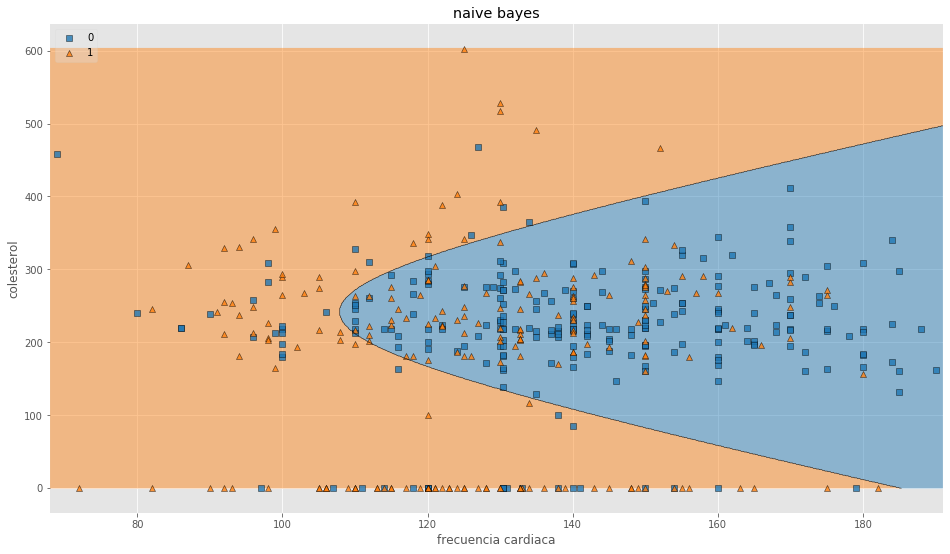

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [300]:
z = model1.predict_proba(testX)
#print(z)

# Loading some example data
#iris = datasets.load_iris()
x = np.array([train.thalach.values, train.chol.values])
X = x.transpose()
y = train.num.values
#print(X)
#print(y)
#print(train.num.values)

model22 = GaussianNB()
model22.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=model22, legend=2)

# Adding axes annotations
plt.xlabel('frecuencia cardiaca')
plt.ylabel('colesterol')
plt.title('naive bayes')
plt.show()



model21 = tree.DecisionTreeClassifier(max_depth = 4)
model21.fit(X, y)

## REDES NEURONALES

A continuacion se resolvera el problema con redes neuronales

In [301]:
from keras.models import Sequential
from keras.layers.core import Dense

# cargamos las 4 combinaciones de las compuertas XOR
training_data = trainX

# y estos son los resultados que se obtienen, en el mismo orden
target_data = trainY

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(training_data, target_data, epochs=1000,batch_size=10)

# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

print(testY)

Epoch 1/1000
365/365 [==============================] - 0s 1ms/step - loss: 7.5223 - acc: 0.5315
Epoch 2/1000
365/365 [==============================] - 0s 93us/step - loss: 6.1516 - acc: 0.5397
Epoch 3/1000
365/365 [==============================] - 0s 93us/step - loss: 5.3625 - acc: 0.6411
Epoch 4/1000
365/365 [==============================] - 0s 93us/step - loss: 5.3411 - acc: 0.6329
Epoch 5/1000
365/365 [==============================] - 0s 90us/step - loss: 5.3157 - acc: 0.6356
Epoch 6/1000
365/365 [==============================] - 0s 99us/step - loss: 5.2041 - acc: 0.6384
Epoch 7/1000
365/365 [==============================] - 0s 101us/step - loss: 2.6631 - acc: 0.5507
Epoch 8/1000
365/365 [==============================] - 0s 107us/step - loss: 1.0963 - acc: 0.5781
Epoch 9/1000
365/365 [==============================] - 0s 112us/step - loss: 0.8113 - acc: 0.6438
Epoch 10/1000
365/365 [==============================] - 0s 107us/step - loss: 0.7442 - acc: 0.6438
Epoch 11/1000
36

365/365 [==============================] - 0s 101us/step - loss: 0.5609 - acc: 0.7288
Epoch 84/1000
365/365 [==============================] - 0s 99us/step - loss: 0.5693 - acc: 0.7342
Epoch 85/1000
365/365 [==============================] - 0s 103us/step - loss: 0.5742 - acc: 0.7260
Epoch 86/1000
365/365 [==============================] - 0s 106us/step - loss: 0.5629 - acc: 0.7151
Epoch 87/1000
365/365 [==============================] - 0s 101us/step - loss: 0.5578 - acc: 0.7397
Epoch 88/1000
365/365 [==============================] - 0s 104us/step - loss: 0.5566 - acc: 0.7315
Epoch 89/1000
365/365 [==============================] - 0s 123us/step - loss: 0.5626 - acc: 0.7315
Epoch 90/1000
365/365 [==============================] - 0s 114us/step - loss: 0.5524 - acc: 0.7507
Epoch 91/1000
365/365 [==============================] - 0s 110us/step - loss: 0.5673 - acc: 0.7397
Epoch 92/1000
365/365 [==============================] - 0s 115us/step - loss: 0.5547 - acc: 0.7562
Epoch 93/1000
3

365/365 [==============================] - 0s 97us/step - loss: 0.4906 - acc: 0.7836
Epoch 165/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4870 - acc: 0.7863
Epoch 166/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4881 - acc: 0.7753
Epoch 167/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4965 - acc: 0.7781
Epoch 168/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4911 - acc: 0.7671
Epoch 169/1000
365/365 [==============================] - 0s 95us/step - loss: 0.4975 - acc: 0.7726
Epoch 170/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4911 - acc: 0.7808
Epoch 171/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4892 - acc: 0.7753
Epoch 172/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4933 - acc: 0.7808
Epoch 173/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4877 - acc: 0.7863
Epoch 174/1000


365/365 [==============================] - 0s 98us/step - loss: 0.4783 - acc: 0.7836
Epoch 246/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4787 - acc: 0.7808
Epoch 247/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4830 - acc: 0.7781
Epoch 248/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4722 - acc: 0.7945
Epoch 249/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4780 - acc: 0.7973
Epoch 250/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4799 - acc: 0.7836
Epoch 251/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4740 - acc: 0.7836
Epoch 252/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4853 - acc: 0.7753
Epoch 253/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4683 - acc: 0.7918
Epoch 254/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4870 - acc: 0.7808
Epoch 255/

365/365 [==============================] - 0s 96us/step - loss: 0.4747 - acc: 0.7781
Epoch 327/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4628 - acc: 0.7836
Epoch 328/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4720 - acc: 0.7753
Epoch 329/1000
365/365 [==============================] - 0s 100us/step - loss: 0.4753 - acc: 0.7781
Epoch 330/1000
365/365 [==============================] - 0s 95us/step - loss: 0.4705 - acc: 0.7890
Epoch 331/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4678 - acc: 0.7863
Epoch 332/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4870 - acc: 0.7753
Epoch 333/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4591 - acc: 0.7945
Epoch 334/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4708 - acc: 0.7781
Epoch 335/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4770 - acc: 0.7781
Epoch 336/100

365/365 [==============================] - 0s 96us/step - loss: 0.4678 - acc: 0.7781
Epoch 408/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4600 - acc: 0.7699
Epoch 409/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4656 - acc: 0.7753
Epoch 410/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4745 - acc: 0.7890
Epoch 411/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4730 - acc: 0.7644
Epoch 412/1000
365/365 [==============================] - 0s 98us/step - loss: 0.4686 - acc: 0.7753
Epoch 413/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4679 - acc: 0.7890
Epoch 414/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4755 - acc: 0.7753
Epoch 415/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4702 - acc: 0.7726
Epoch 416/1000
365/365 [==============================] - 0s 98us/step - loss: 0.4578 - acc: 0.7863
Epoch 417/1000


Epoch 489/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4623 - acc: 0.7836
Epoch 490/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4647 - acc: 0.7671
Epoch 491/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4695 - acc: 0.7671
Epoch 492/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4647 - acc: 0.7671
Epoch 493/1000
365/365 [==============================] - 0s 98us/step - loss: 0.4648 - acc: 0.7726
Epoch 494/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4600 - acc: 0.7808
Epoch 495/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4630 - acc: 0.7781
Epoch 496/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4640 - acc: 0.7918
Epoch 497/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4792 - acc: 0.7836
Epoch 498/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4689 - acc: 0.7890

365/365 [==============================] - 0s 96us/step - loss: 0.4608 - acc: 0.7918
Epoch 571/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4612 - acc: 0.7890
Epoch 572/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4589 - acc: 0.7973
Epoch 573/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4602 - acc: 0.7671
Epoch 574/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4511 - acc: 0.7973
Epoch 575/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4622 - acc: 0.7973
Epoch 576/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4726 - acc: 0.7781
Epoch 577/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4771 - acc: 0.7753
Epoch 578/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4568 - acc: 0.7781
Epoch 579/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4560 - acc: 0.7918
Epoch 580/1000

365/365 [==============================] - 0s 95us/step - loss: 0.4755 - acc: 0.7699
Epoch 652/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4582 - acc: 0.7890
Epoch 653/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4582 - acc: 0.7863
Epoch 654/1000
365/365 [==============================] - 0s 100us/step - loss: 0.4541 - acc: 0.7918
Epoch 655/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4714 - acc: 0.7726
Epoch 656/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4537 - acc: 0.7918
Epoch 657/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4530 - acc: 0.7836
Epoch 658/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4606 - acc: 0.7781
Epoch 659/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4609 - acc: 0.7699
Epoch 660/1000
365/365 [==============================] - 0s 100us/step - loss: 0.4557 - acc: 0.7890
Epoch 661/10

365/365 [==============================] - 0s 99us/step - loss: 0.4534 - acc: 0.7918
Epoch 733/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4491 - acc: 0.7863
Epoch 734/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4505 - acc: 0.7890
Epoch 735/1000
365/365 [==============================] - 0s 142us/step - loss: 0.4574 - acc: 0.7918
Epoch 736/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4480 - acc: 0.7945
Epoch 737/1000
365/365 [==============================] - 0s 109us/step - loss: 0.4586 - acc: 0.7808
Epoch 738/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4551 - acc: 0.7836
Epoch 739/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4573 - acc: 0.7863
Epoch 740/1000
365/365 [==============================] - 0s 109us/step - loss: 0.4616 - acc: 0.7781
Epoch 741/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4569 - acc: 0.7973
Epoch 7

365/365 [==============================] - 0s 134us/step - loss: 0.4548 - acc: 0.8055
Epoch 814/1000
365/365 [==============================] - 0s 122us/step - loss: 0.4448 - acc: 0.8000
Epoch 815/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4512 - acc: 0.7890
Epoch 816/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4446 - acc: 0.7808
Epoch 817/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4489 - acc: 0.7836
Epoch 818/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4617 - acc: 0.7863
Epoch 819/1000
365/365 [==============================] - 0s 105us/step - loss: 0.4553 - acc: 0.8027
Epoch 820/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4491 - acc: 0.7808
Epoch 821/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4495 - acc: 0.7973
Epoch 822/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4494 - acc: 0.7808
Epoch

365/365 [==============================] - 0s 100us/step - loss: 0.4545 - acc: 0.7781
Epoch 895/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4485 - acc: 0.7918
Epoch 896/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4522 - acc: 0.7863
Epoch 897/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4474 - acc: 0.7863
Epoch 898/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4463 - acc: 0.7918
Epoch 899/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4543 - acc: 0.7836
Epoch 900/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4478 - acc: 0.7836
Epoch 901/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4450 - acc: 0.7945
Epoch 902/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4492 - acc: 0.8027
Epoch 903/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4491 - acc: 0.7836
Epoch 90

365/365 [==============================] - 0s 104us/step - loss: 0.4502 - acc: 0.7863
Epoch 976/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4422 - acc: 0.8000
Epoch 977/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4513 - acc: 0.7863
Epoch 978/1000
365/365 [==============================] - 0s 105us/step - loss: 0.4488 - acc: 0.7836
Epoch 979/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4532 - acc: 0.7836
Epoch 980/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4495 - acc: 0.7863
Epoch 981/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4496 - acc: 0.7918
Epoch 982/1000
365/365 [==============================] - 0s 106us/step - loss: 0.4482 - acc: 0.7863
Epoch 983/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4713 - acc: 0.7890
Epoch 984/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4446 - acc: 0.8027
Epoch